# Movie Reviews Recommendation System

#### import relevant dependancies

In [206]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import warnings
import os
import sys
import csv

from collections import defaultdict, Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel, linear_kernel, cosine_similarity

%matplotlib inline

sb.set()
sb.set_style('ticks')
sb.set_palette('viridis')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

warnings.filterwarnings('ignore')

#### Load dataset from local machine

In [30]:
credits = pd.read_csv(r"D:\Open Classroom\Datasets\TMDB 5000 Movie Dataset\tmdb_5000_credits.csv")
movies = pd.read_csv(r"D:\Open Classroom\Datasets\TMDB 5000 Movie Dataset\tmdb_5000_movies.csv")

In [31]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [32]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [33]:
credits.rename(columns = {'movie_id':'id'}, inplace = True)
credits.head(2)

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


#### Merge the 2 dataframes

In [34]:
df = movies.merge(credits, on='id')
df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [35]:
df.drop(columns = ['homepage', 'title_x', 'title_y', 'status', 'production_countries'], inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

In [37]:
df.shape

(4803, 18)

Text(0.5, 1.0, 'Pearsons Correlation of Columns')

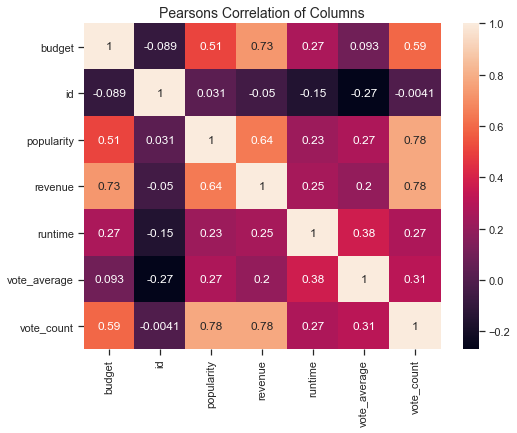

In [38]:
plt.figure(figsize = (8, 6))
sb.heatmap(df.corr(), annot = True)
plt.title('Pearsons Correlation of Columns', fontdict = {'size': 14})

## Content Based Recommendation System

In [39]:
df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [40]:

# Convert the document to a matrix term vector

tf_vect = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word', 
                          token_pattern=r'\w{1,}', ngram_range=(1,3), stop_words='english')

# Filling NaN values with empty string
df['overview'] = df['overview'].fillna('')

# Fitting and Transforming the TF-ID on the overview series
ovw_matrix = tf_vect.fit_transform(df['overview'])

In [41]:
ovw_matrix

<4803x10417 sparse matrix of type '<class 'numpy.float64'>'
	with 127220 stored elements in Compressed Sparse Row format>

In [47]:
print('The Document term matrix has ' + str(ovw_matrix.shape[0]) + ' columns ' + '\nand ' + str(ovw_matrix.shape[1]) + ' features') 

The Document term matrix has 4803 columns 
and 10417 features


## Sigmoid Kernel: 
##### this function is equivalent to a two-layer, perceptron model of the neural network, which is used as an activation function for artificial neurons.
https://media.geeksforgeeks.org/wp-content/uploads/20200515150022/sigmoid.jpg

In [52]:
sig = sigmoid_kernel(ovw_matrix, ovw_matrix)

In [53]:
sig[0]

array([0.76163447, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [64]:
# Reverse mapping of indices and movie title
indices = pd.Series(df.index, df['original_title']).drop_duplicates()
indices.tail(20)

original_title
Backmask                        4783
The Puffy Chair                 4784
Stories of Our Lives            4785
Breaking Upwards                4786
All Superheroes Must Die        4787
Pink Flamingos                  4788
Clean                           4789
دایره                           4790
Tin Can Man                     4791
キュア                             4792
On The Downlow                  4793
Sanctuary: Quite a Conundrum    4794
Bang                            4795
Primer                          4796
Cavite                          4797
El Mariachi                     4798
Newlyweds                       4799
Signed, Sealed, Delivered       4800
Shanghai Calling                4801
My Date with Drew               4802
dtype: int64

In [70]:
# We pass in the movie title to our indices which will determine the index of the movie
indices['Cavite']

4797

In [71]:
# Using the index of the movie, we pass it to our sigmoid kernel for matrix comparison
sig[4797]

array([0.76159416, 0.76159416, 0.76159508, ..., 0.76159427, 0.76159416,
       0.76159483])

In [80]:
# we list all the possible outcomes of the sigmoid 
list(enumerate(sig[indices['Cavite']]))[0:10]

[(0, 0.7615941559557649),
 (1, 0.7615941559557649),
 (2, 0.7615950825826142),
 (3, 0.7615944383046256),
 (4, 0.7615944534708938),
 (5, 0.7615942764071452),
 (6, 0.761594623463091),
 (7, 0.761594290631143),
 (8, 0.7615943212050055),
 (9, 0.7615945312529745)]

In [87]:
# So after getting all the range values from the sigmoid function, I will be sorting the range in reverse order 
sorted(list(enumerate(sig[indices['Cavite']])), key = lambda x: x[1], reverse = True)[:10]

[(4797, 0.7616344692549826),
 (3130, 0.7616059705272574),
 (666, 0.7616044262077277),
 (4677, 0.7616033361808467),
 (4732, 0.7616019695793557),
 (3879, 0.7616018529502777),
 (1835, 0.7616005393712282),
 (2215, 0.7616005386547298),
 (4006, 0.7616001684652346),
 (4407, 0.7615998584413666)]

#### create a function that returns the recommended movie title based on sigmoid functionality

In [217]:
def movie_recommender(title, sig=sig):
    
    d_base_movies = [x for x in df['original_title']]
    
    if title in d_base_movies:
        
        idx = indices[title]

        indx_list = list(enumerate(sig[idx]))

        sorted_list = sorted(indx_list, key = lambda x: x[1], reverse = True)

        top_ten = sorted_list[1:11]

        movie_indice = [i[0] for i in top_ten]

        print("")
        print("Since you've watched " + title + " \nHere is a list of 10 recommended Movies from our Database")
        print("")

        return df[['original_title', 'vote_average', 'runtime', 'release_date']].iloc[movie_indice].sort_values(by = ['vote_average'], ascending = False)
    else:
        print("The Movie : " + title + " IS NOT FOUND")
        print("PLEASE CONTACT THE ADMIN")

In [218]:
movie_recommender(input('Movie Title : ').lower().title())#.to_frame()

Movie Title :  john carter



Since you've watched John Carter 
Here is a list of 10 recommended Movies from our Database



,original_title,vote_average,runtime,release_date
1307,The Hurricane,7.2,146.0,1999-09-17
3068,Rescue Dawn,6.9,126.0,2006-09-09
3349,Desperado,6.8,104.0,1995-08-25
345,Rush Hour 2,6.4,90.0,2001-08-03
581,Star Trek: Insurrection,6.3,103.0,1998-12-10
4274,Eddie: The Sleepwalking Cannibal,6.1,79.0,2012-04-22
2932,Raising Cain,5.9,91.0,1992-08-07
4161,The Marine 4: Moving Target,5.8,90.0,2015-04-10
91,Independence Day: Resurgence,4.9,120.0,2016-06-22
1254,Get Carter,4.8,102.0,2000-10-06


## Linear Kernel

In [183]:
lk = linear_kernel(ovw_matrix, ovw_matrix)


In [185]:
lk_ind = pd.Series(df.index, df['original_title']).drop_duplicates()
lk_ind

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [186]:
lk_ind['John Carter']

4

In [187]:
lk[4]

array([0.        , 0.04041105, 0.00658302, ..., 0.01182898, 0.        ,
       0.01855202])

In [190]:
list(enumerate(lk[lk_ind['John Carter']]))[:10]

[(0, 0.0),
 (1, 0.04041104869093043),
 (2, 0.006583020070713267),
 (3, 0.022070989024338863),
 (4, 1.0000000000000002),
 (5, 0.0050386156576234685),
 (6, 0.029749362194991448),
 (7, 0.049667084365566994),
 (8, 0.0069125607141225206),
 (9, 0.03427259206982752)]

In [219]:
def make_recommmendation(title, lk=lk):
    
    d_base_movies = [x for x in df['original_title']]
    
    if title in d_base_movies:
    
        idx = lk_ind[title]

        ind_list = list(enumerate(lk[idx]))

        sorted_list = sorted(ind_list, key = lambda x: x[1], reverse = False)

        top_ten = sorted_list[1:11]

        rec_movies = [x[0] for x in top_ten]
        
        print("")
        print("Since you've watched " + title + " \nHere is a list of 10 recommended Movies from our Database")
        print("")

        return df[['original_title', 'vote_average', 'runtime', 'release_date']].iloc[rec_movies].sort_values(by = ['vote_average'], ascending = False)
    else:
        print("The Movie : " + title + " IS NOT FOUND")
        print("PLEASE CONTACT THE ADMIN")

In [220]:
make_recommmendation(input('Movie Title : ').lower().title())

Movie Title :  john carter



Since you've watched John Carter 
Here is a list of 10 recommended Movies from our Database



,original_title,vote_average,runtime,release_date
22,The Hobbit: The Desolation of Smaug,7.6,161.0,2013-12-11
25,Titanic,7.5,194.0,1997-11-18
44,Furious 7,7.3,137.0,2015-04-01
34,Monsters University,7.0,104.0,2013-06-20
60,A Christmas Carol,6.6,96.0,2009-11-04
15,The Chronicles of Narnia: Prince Caspian,6.3,150.0,2008-05-15
11,Quantum of Solace,6.1,106.0,2008-10-30
13,The Lone Ranger,5.9,149.0,2013-07-03
62,The Legend of Tarzan,5.5,109.0,2016-06-29
61,Jupiter Ascending,5.2,124.0,2015-02-04


## Cosine Similarity

In [207]:
cs = cosine_similarity(ovw_matrix, ovw_matrix)

In [208]:
cs_ind = pd.Series(df.index, df['original_title']).drop_duplicates()
cs_ind

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [221]:
def movie_recommendation(title, cs=cs):
    
    db_movies = [x for x in df['original_title']]
    
    if title in db_movies:
    
        idx = cs_ind[title]

        ind_list = list(enumerate(cs[idx]))

        sort_list = sorted(ind_list, key = lambda x: x[1], reverse = True)

        top_ten = sort_list[1:11]

        rec_mov = [i[0] for i in top_ten]
        
        return df[['original_title', 'vote_average', 'runtime', 'release_date']].iloc[rec_mov].sort_values(by = ['vote_average'], ascending = False)
    else:
        print("The Movie : " + title + " IS NOT FOUND")
        print("PLEASE CONTACT THE ADMIN")
    

In [222]:
movie_recommendation(input('Movie Title : ').lower().title())

Movie Title :  john carter


,original_title,vote_average,runtime,release_date
1307,The Hurricane,7.2,146.0,1999-09-17
3068,Rescue Dawn,6.9,126.0,2006-09-09
3349,Desperado,6.8,104.0,1995-08-25
345,Rush Hour 2,6.4,90.0,2001-08-03
581,Star Trek: Insurrection,6.3,103.0,1998-12-10
4274,Eddie: The Sleepwalking Cannibal,6.1,79.0,2012-04-22
2932,Raising Cain,5.9,91.0,1992-08-07
4161,The Marine 4: Moving Target,5.8,90.0,2015-04-10
91,Independence Day: Resurgence,4.9,120.0,2016-06-22
1254,Get Carter,4.8,102.0,2000-10-06
